# HandWritten Digits Recognition

### Import Necessary Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


### Load the Dataset

In [ ]:
mnist_data = tf.keras.datasets.mnist

(X_train,y_train), (X_test,y_test) = mnist_data.load_data()

In [ ]:
print(f'Training Images consists of {X_train.shape[0]} images and each image with shape {X_train[0].shape}')
print(f'Testing Images consists of {X_test.shape[0]} images and each image with shape {X_test[0].shape}')

Training Images consists of 60000 images and each image with shape (28, 28)
Testing Images consists of 10000 images and each image with shape (28, 28)


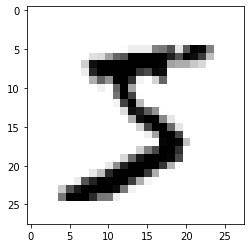

In [ ]:
# Displaying images from dataset

plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

### Normailze the images

Original image consists of pixel range from 0-255. After normalizing, all the pixel values are converted to the range 0-1.

In [ ]:
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

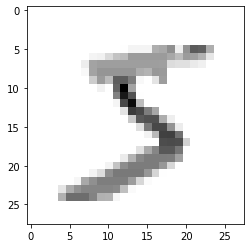

In [ ]:
# Displaying images from dataset after normalizing

plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

### Build a Model



*   1st layer is the Flatten layer, that converts (28,28) images to 784 vector (28*28 = 784)
*   2nd and 3rd layers are fully connnected Dense layers with 128 nodes within each layer. Here we used 'relu' (Rectified Linear activation Unit)  
as a activation function, which makes -ve values to 0. below is the function of ReLU

    ```
    f(x) = max(0,x)
    ```
* 4th layer is the Dense layer with 10 nodes as output(0-9 digits). Here we used softmax as output, that converts a vector of numbers into a vector of probabilities and the maximum probability node/index will be our output. 




In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Then we will compile our model with 'adam' optimizer and loss function as'sparse_categorical_crossentropy', which performs well for categorical classification problems.

Finally, we will fit our training images and labels to our model and I have used 10% of our training examples for cross validation and with batch size = 32

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

history = model.fit(X_train,y_train,validation_split = 0.1,batch_size=32, epochs=5)

Epoch 1/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2767 - acc: 0.9161 - val_loss: 0.1188 - val_acc: 0.9638
Epoch 2/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1142 - acc: 0.9647 - val_loss: 0.0952 - val_acc: 0.9700
Epoch 3/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0779 - acc: 0.9753 - val_loss: 0.0832 - val_acc: 0.9760
Epoch 4/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0577 - acc: 0.9821 - val_loss: 0.0840 - val_acc: 0.9767
Epoch 5/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0459 - acc: 0.9848 - val_loss: 0.0784 - val_acc: 0.9793


### Test our Model

In [ ]:
test_loss , test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0908 - acc: 0.9752


In [ ]:
print('Test Accuracy: {:.2f}%'.format(test_acc*100) )

Test Accuracy: 97.52%


In [ ]:
pred = model.predict([X_test])

Predicted :  7
Actual:  7


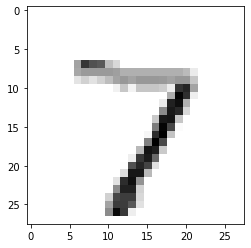

In [ ]:
print('Predicted : ',np.argmax(pred[0]))
print('Actual: ',y_test[0])
plt.imshow(X_test[0],cmap=plt.cm.binary)
plt.show()

In [ ]:
for i in range(56,62):
    print('Predicted : ',np.argmax(pred[i]))
    print('Actual: ',y_test[i])
    print('-'*20)

Predicted :  4
Actual:  4
--------------------
Predicted :  1
Actual:  1
--------------------
Predicted :  9
Actual:  9
--------------------
Predicted :  5
Actual:  5
--------------------
Predicted :  7
Actual:  7
--------------------
Predicted :  2
Actual:  8
--------------------


K HUNNURJI RAO